# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
from bokeh.core.property.vectorization import value
from ydata_profiling import ProfileReport
import pandas as pd

# Einlesen des Datensatzes
data = pd.read_csv('./data/stadtgarage.csv') 

# Report in Variable speichern
profile = ProfileReport(data, title="Stadtgarage Auslastung", tsmode=True, explorative=True)

profile.to_notebook_iframe()

#profile.to_file("report.json")
#json_data = profile.to_json()

# Report exportieren
profile.to_file(output_file='report.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\kircs\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


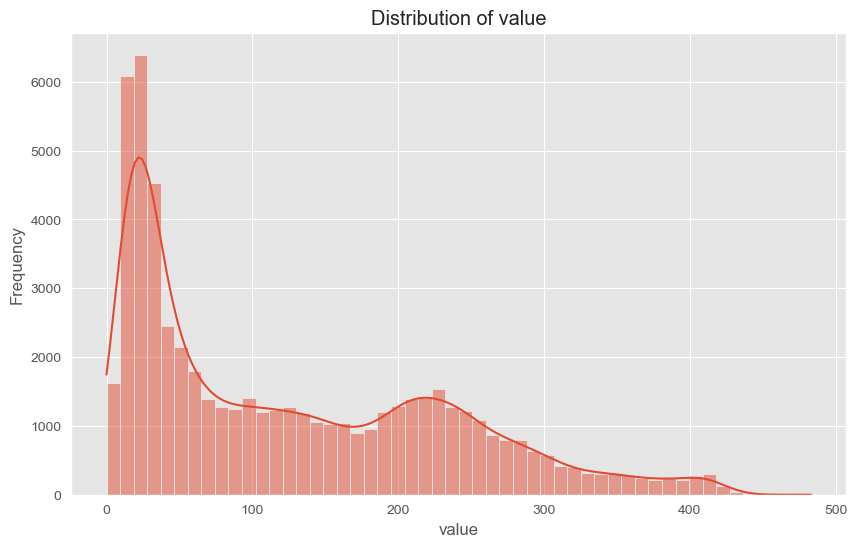

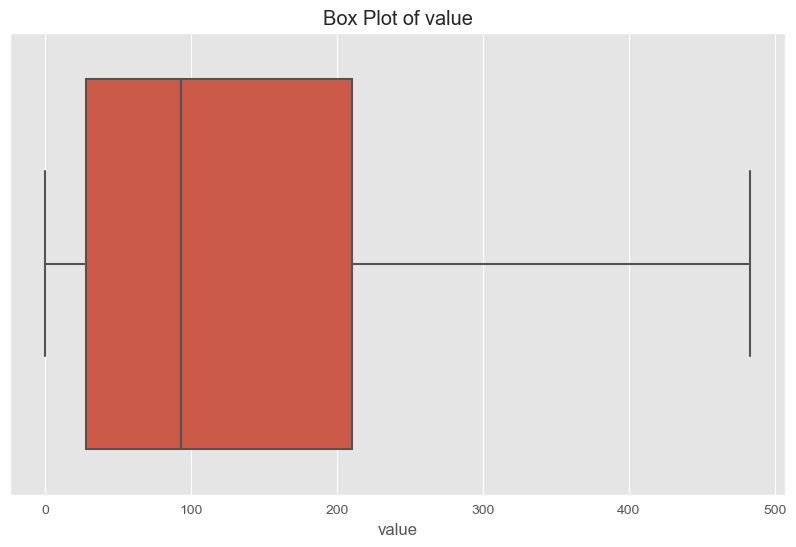


Summary Statistics for value:
count    57973.000000
mean       124.579218
std        106.645563
min          0.000000
25%         28.000000
50%         93.000000
75%        210.000000
max        483.000000
Name: value, dtype: float64

--------------------------------------------------



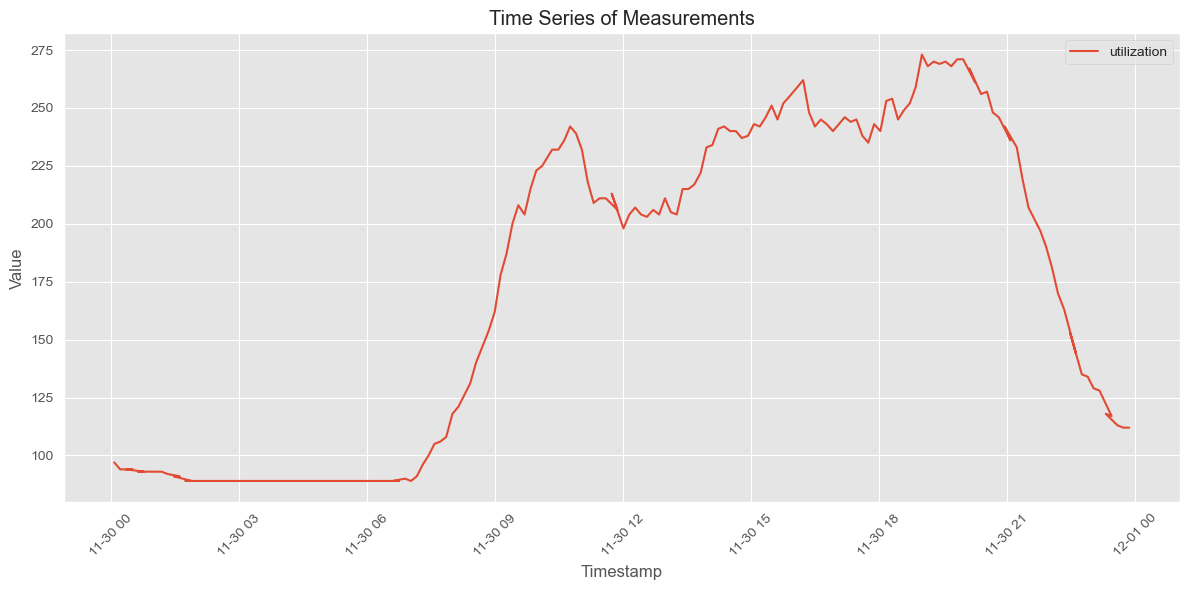

In [5]:
# Importieren benötigter Bibliotheken
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Festlegen der Visualisierungseinstellungen (Nicht unbedingt nötig)
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

# Einlesen des Datensatzes
data = pd.read_csv('./data/stadtgarage.csv') 

data = data.replace([np.inf, -np.inf], np.nan)

data = data[data['measurement_name'] == 'utilization']

# Ausgabe der ersten Zeilen des Datensatzes
data.head()

# Identify numerical columns
numerical_columns = data.select_dtypes(include=[np.number]).columns

# Perform univariate analysis on numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    
    # Histogram with KDE
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    
    # Box plot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot of {column}')
    plt.show()
    
    # Summary statistics
    print(f"\nSummary Statistics for {column}:")
    print(data[column].describe())
    print("\n" + "-"*50 + "\n")
    
    # Convert timestamp to datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Get data from a specific date range
start_date = pd.to_datetime('2023-11-30')
end_date = pd.to_datetime('2023-12-01')
filtered_df = data[(data['timestamp'] >= start_date) & (data['timestamp'] <= end_date)]

# Time series plot
plt.figure(figsize=(12, 6))
for name in filtered_df['measurement_name'].unique():
    filtered_df = filtered_df[filtered_df['measurement_name'] == name]
    plt.plot(filtered_df['timestamp'], filtered_df['value'], label=name)

plt.title('Time Series of Measurements')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


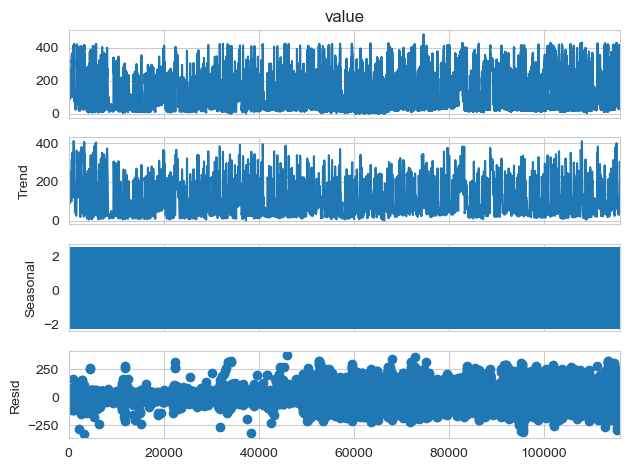

In [25]:
import numpy as np 
import pandas as pd 
import matplotlib as plt 
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose 

data = pd.read_csv('./data/stadtgarage.csv') 
df = pd.DataFrame(data)
df_filtered = df[df['measurement_name'] == 'utilization']

# ETS Decomposition 
result = seasonal_decompose(df_filtered['value'], model='additive', period=24) 
# ETS plot  
result.plot()
pyplot.show()

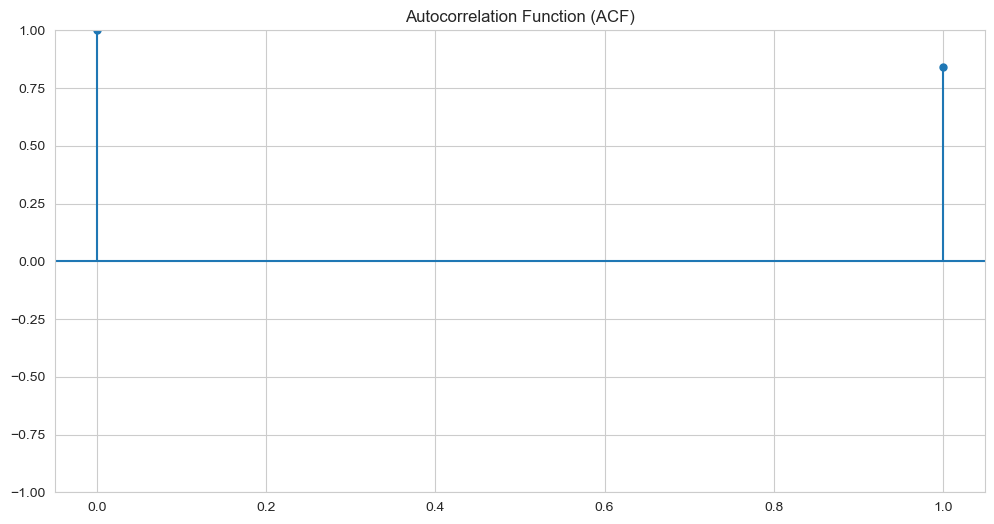

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=291.89 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=680989.999, Time=6.32 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=651721.569, Time=182.99 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=663681.313, Time=76.53 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=680988.000, Time=1.72 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=663224.189, Time=3.18 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=647308.289, Time=177.46 sec


MemoryError: Unable to allocate 606. MiB for an array with shape (37, 37, 57974) and data type float64

In [111]:
import statsmodels.api as sm
import statsmodels
import pandas as pd 
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

data = pd.read_csv('./data/stadtgarage.csv') 
df = pd.DataFrame(data)
df.set_index('timestamp', inplace=True)
df_filtered = df[df['measurement_name'] == 'utilization']

# Plot Autocorrelation Function (ACF)
plt.figure(figsize=(12, 6))
sm.tsa.acf(df_filtered['value'], nlags= 1)
fig = tsaplots.plot_acf(df_filtered['value'], lags= 1, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Import the library 
from pmdarima import auto_arima 
  
# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 
# Fit auto_arima function to AirPassengers dataset 
stepwise_fit = auto_arima(df_filtered['value'], start_p = 1, start_q = 1, 
                          max_p = 3, max_q = 3, m = 12, 
                          start_P = 0, seasonal = True, 
                          d = None, D = 1, trace = True, 
                          error_action ='ignore',   # we don't want to know if an order does not work 
                          suppress_warnings = True,  # we don't want convergence warnings 
                          stepwise = True)           # set to stepwise 
  
# To print the summary 
stepwise_fit.summary() 
# Calculate PACF
#pacf_values = sm.tsa.pacf(df_filtered['value'], nlags=40)

# Plot PACF
#sm.graphics.tsa.plot_pacf(df_filtered['value'], lags=40, method="ldb")
#plt.show()

#statsmodels.graphics.tsaplots.plot_pacf(df_filtered['value'], ax=None, lags=None, alpha=0.05, method='ywm', use_vlines=True, title='Partial Autocorrelation2', zero=True, vlines_kwargs=None)
#plt.show()

#Ein schneller Abfall der partiellen Autokorrelation deutet darauf hin, dass ein AR-Modell besser geeignet ist.
# Plot Partial Autocorrelation Function (PACF)
#plt.figure(figsize=(12, 6))
#sm.graphics.tsa.plot_pacf(df_filtered['value'], lags=1000, method="ywm", ax=plt.gca())
#plt.title('Partial Autocorrelation Function (PACF)')
#plt.show()



In [100]:
df_filtered.head(5)

,sensor_id,measurement_name,value
timestamp,,,
2023-11-29 11:51:59,e1b4e8e8-a079-463a-9bf2-3a16dca41d34,utilization,260
2023-11-29 12:00:15,e1b4e8e8-a079-463a-9bf2-3a16dca41d34,utilization,255
2023-11-29 12:08:31,e1b4e8e8-a079-463a-9bf2-3a16dca41d34,utilization,242
2023-11-29 12:16:47,e1b4e8e8-a079-463a-9bf2-3a16dca41d34,utilization,228
2023-11-29 12:25:05,e1b4e8e8-a079-463a-9bf2-3a16dca41d34,utilization,235


In [107]:
df_filtered.index

TypeError: unsupported operand type(s) for -: 'str' and 'str'